In [53]:
#@title Imports

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

from IPython.display import clear_output, display
import ipywidgets as widgets

pd.set_option("display.max_columns", 500)
plt.rcParams["figure.figsize"] = (20,3)

try :
    
    from ipynb.fs.full.WS1_KALMAN_FILTER_BELGIUM import 

In [ ]:
path = "https://raw.githubusercontent.com/rs-delve/covid19_datasets/master/dataset/combined_dataset_latest.csv"

data = pd.read_csv(path, parse_dates = ['DATE'])

data.head()

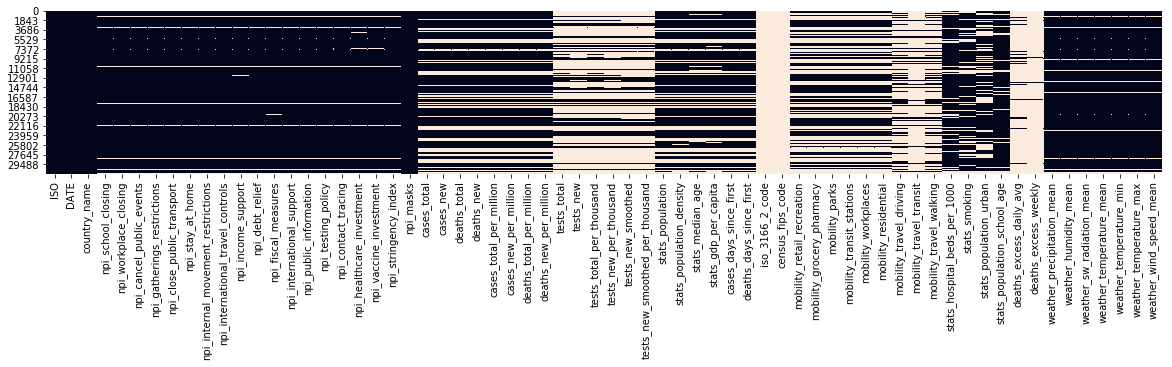

In [13]:
sns.heatmap(data.isnull(), cbar = False)

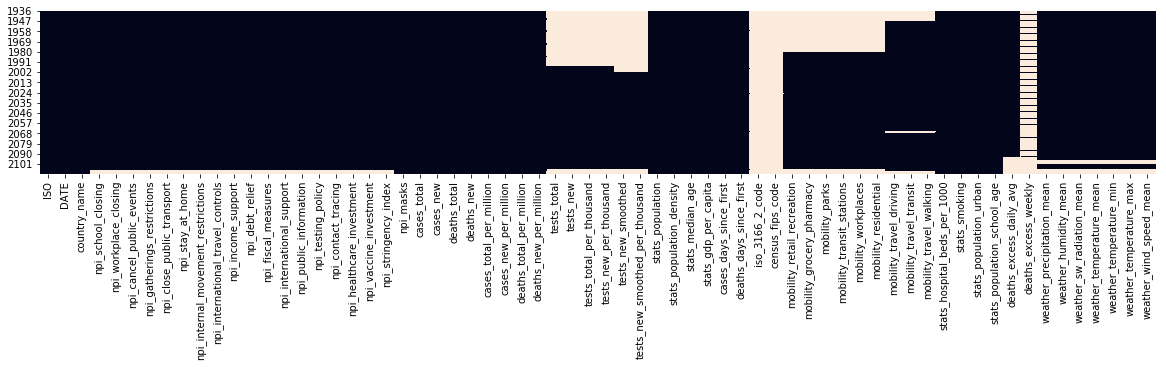

In [16]:
data_belg = data[data['country_name']=='Belgium']

sns.heatmap(data_belg.isnull(), cbar = False)

In [19]:
[c for c in data.columns if 'smoothed' in c]

['tests_new_smoothed', 'tests_new_smoothed_per_thousand']

In [59]:
## Analyzing New Cases vs Stringegy Index 

def add_widget(country):
    
    country_widget = widgets.Dropdown(options = sorted([(c, c) for c in data.country_name.unique()]), value = country, descriptio= "Country: ", )
    
    country_widget.observe(lambda d: plot_country(d['new']), 'value')
    
    display(country_widget)
    
def plot_country(country):
        
    clear_output()
    
    add_widget(country)
    
    fig, ax = plt.subplots(figsize = (16, 6))
    
    ax2 = ax.twinx()
    
    ax2.set_ylim(0, 100)
    
    plot_df = data.query(f'country_name == "{country}"').set_index('DATE')
    
    plot_df['cases_new'].plot(color = "b", ls = ":",  label = 'Reported Cases', ax = ax)
    
    ax.set_title(f'Reported Cases vs Stringency Index for country: {country}')
    
    plot_df.npi_stringency_index.plot(legend = "Stringency", ax = ax2, c = "r", ls = "--")
    
    ax.set_ylabel("New Reported Cases")
    
    ax2.set_ylabel("NPI Stringency Index")
    
    ax.legend(loc = 2)
    ax2.legend(loc = 4)
    
    

Dropdown(index=168, options=(('Afghanistan', 'Afghanistan'), ('Albania', 'Albania'), ('Algeria', 'Algeria'), (…

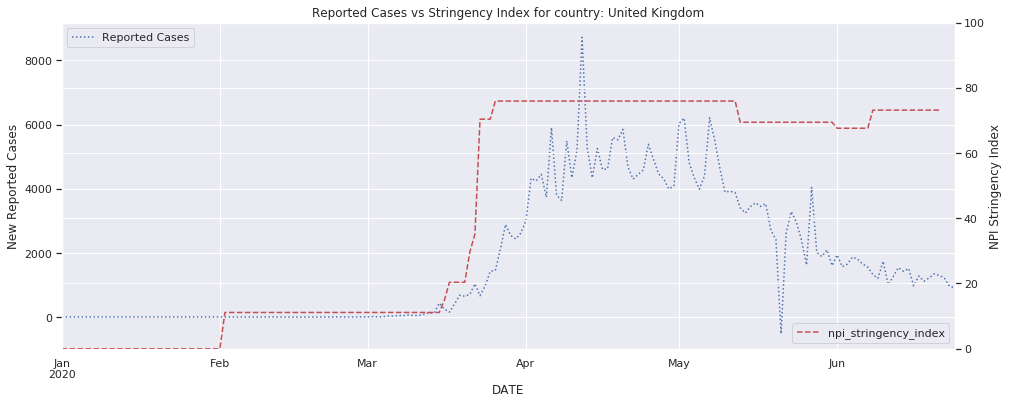

In [60]:
plot_country("France")

In [ ]:
## Analyzing Mobility Data

